In [1]:
%load_ext nb_black

<IPython.core.display.Javascript object>

In [2]:
import sys

import catboost as cb

wids_path = "/Users/diana/Documents/projects/widsdatathon2022"
sys.path.append(wids_path)

from global_vars import all_feature_columns, response_column
from utils.visualize import *

pd.set_option("display.max_columns", 500)
sns.set_context("talk")

<IPython.core.display.Javascript object>

In [3]:
feature_dict = {
    "base_cat": {
        "cols_to_reduce": [],
        "log10_transform_cols": [],
        "if_one_hot": False,
        "backfill_dict": {},
    },
    "base_onehot": {
        "cols_to_reduce": [],
        "log10_transform_cols": [],
        "if_one_hot": True,
        "backfill_dict": {},
    },
    "log_onehot": {
        "cols_to_reduce": [],
        "log10_transform_cols": ["floor_area"],
        "if_one_hot": True,
        "backfill_dict": {},
    },
    "log_temp_pca_onehot": {
        "cols_to_reduce": temp_col_list,
        "log10_transform_cols": ["floor_area"],
        "if_one_hot": True,
        "backfill_dict": {},
    },
    "log_temp_pca_onehot_impute": {
        "cols_to_reduce": temp_col_list,
        "log10_transform_cols": ["floor_area"],
        "if_one_hot": True,
        "backfill_dict": {
            "energy_star_rating": ["state_factor", "building_class", "facility_type"]
        },
    },
    "log_temp_pca_cat": {
        "cols_to_reduce": temp_col_list,
        "log10_transform_cols": ["floor_area"],
        "if_one_hot": False,
        "backfill_dict": {},
    },
    "log_temp_precip_pca_onehot": {
        "cols_to_reduce": temp_col_list + inch_col_list,
        "log10_transform_cols": ["floor_area"],
        "if_one_hot": True,
        "backfill_dict": {},
    },
}

<IPython.core.display.Javascript object>

In [4]:
rmse_df = pd.DataFrame()
for config_name in feature_dict.keys():
    print(config_name)
    _df = pd.read_csv(f"{wids_path}/validation_result/{config_name}.csv").assign(
        config=config_name
    )
    rmse_df = pd.concat([rmse_df, _df], axis=0)
rmse_df = rmse_df.reset_index(drop=True)

base_cat
base_onehot
log_onehot
log_temp_pca_onehot
log_temp_pca_onehot_impute
log_temp_pca_cat
log_temp_precip_pca_onehot


<IPython.core.display.Javascript object>

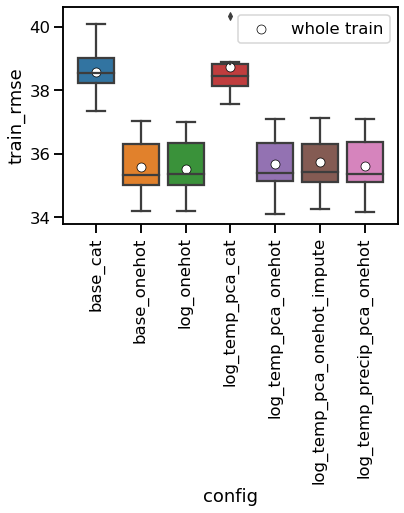

<IPython.core.display.Javascript object>

In [6]:
ax = sns.boxplot(
    data=rmse_df.query("method == 'loyo'").sort_values("config"),
    x="config",
    y="train_rmse",
)
sns.scatterplot(
    data=rmse_df.query("method == 'whole train'").sort_values("config"),
    x="config",
    y="train_rmse",
    ax=ax,
    color="white",
    edgecolor="k",
    label="whole train",
)
_ = ax.set_xticklabels(ax.get_xticklabels(), rotation=90)

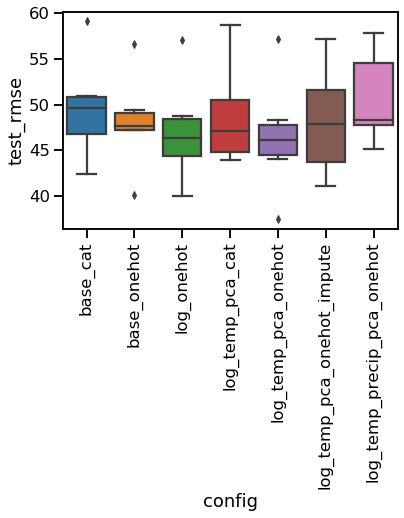

<IPython.core.display.Javascript object>

In [7]:
ax = sns.boxplot(data=rmse_df.sort_values("config"), x="config", y="test_rmse")
_ = ax.set_xticklabels(ax.get_xticklabels(), rotation=90)